# Априорное распределение в нашем случае - это Бета-распределение с параметрами alpha && beta

In [4]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
counter = 0
colors = ["red", "green", "magenta", "yellow", "blue", "purple", "pink", "gray", "black", "brown"] # size = 10
def draw_beta(alpha, beta) :
    global counter
    x = np.linspace(0,1,50)
    y = sps.beta.pdf(x, alpha, beta)
    plt.plot(x, y, color = colors[counter%10])
    counter+=1


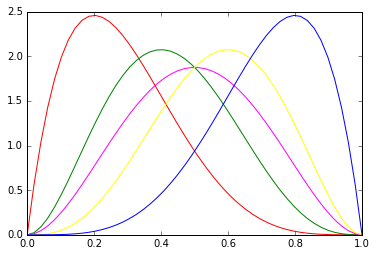

In [6]:
draw_beta(2,5)
draw_beta(3,4)
draw_beta(3,3)
draw_beta(4,3)
draw_beta(5,2)

### Значения параметров гаммы можно рассматривать так: проводим альфа + бета испытаний. И говорим, что орлов выпало альфа а решек - бета. Аналог честной монеты - альфа равно бета.

# Генерируем выборку для разных p, и строим байесовские с разными параметрами, максимально правдоподобные оценки, сравниваем их.

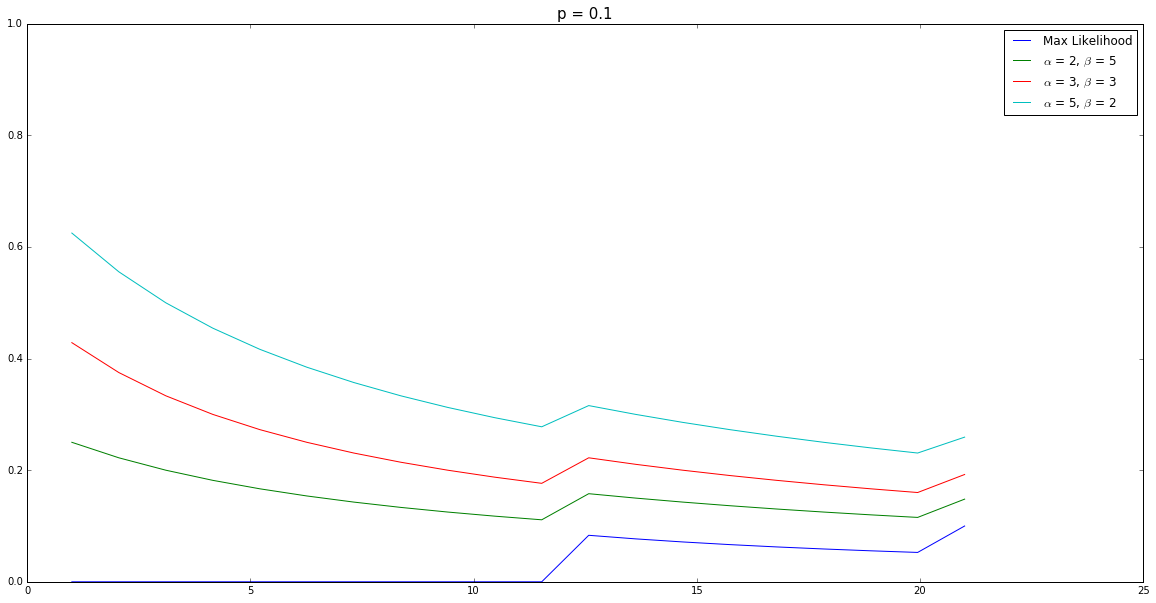

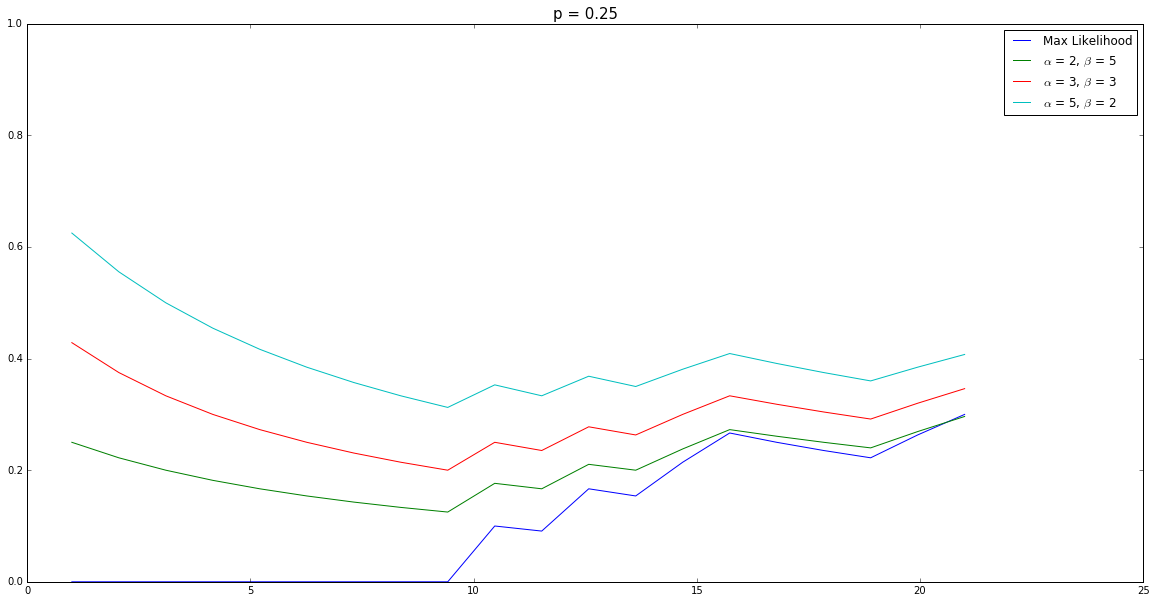

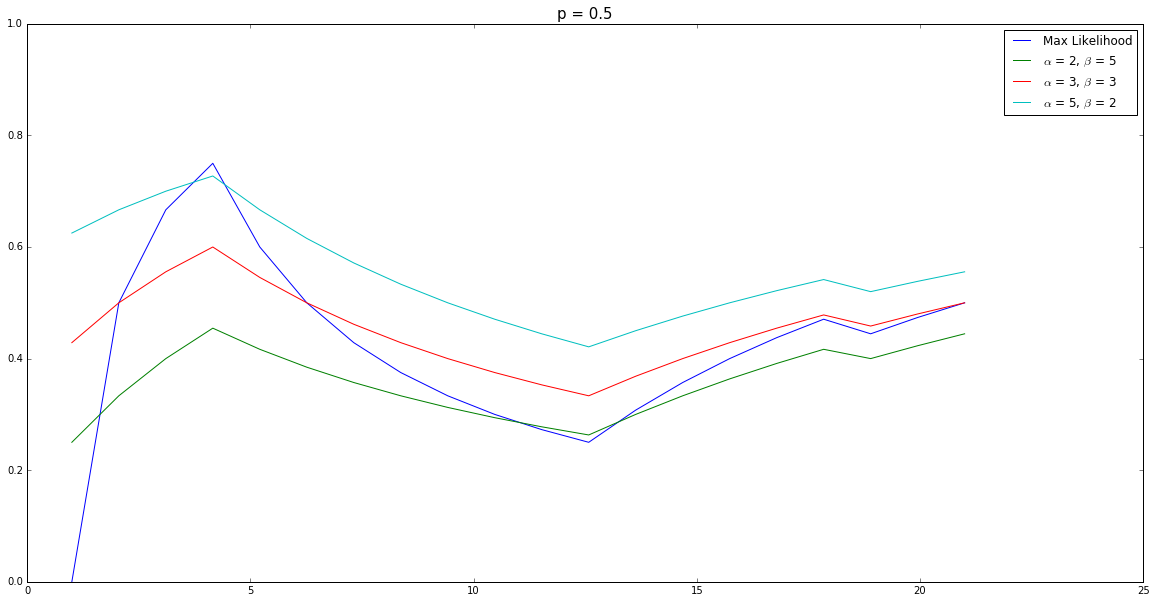

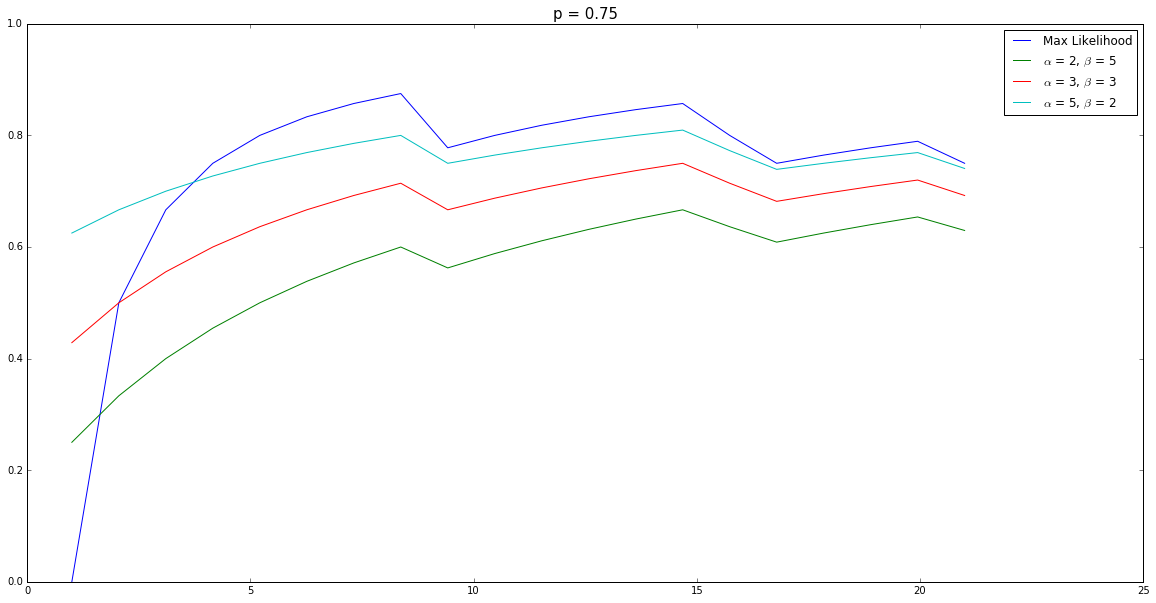

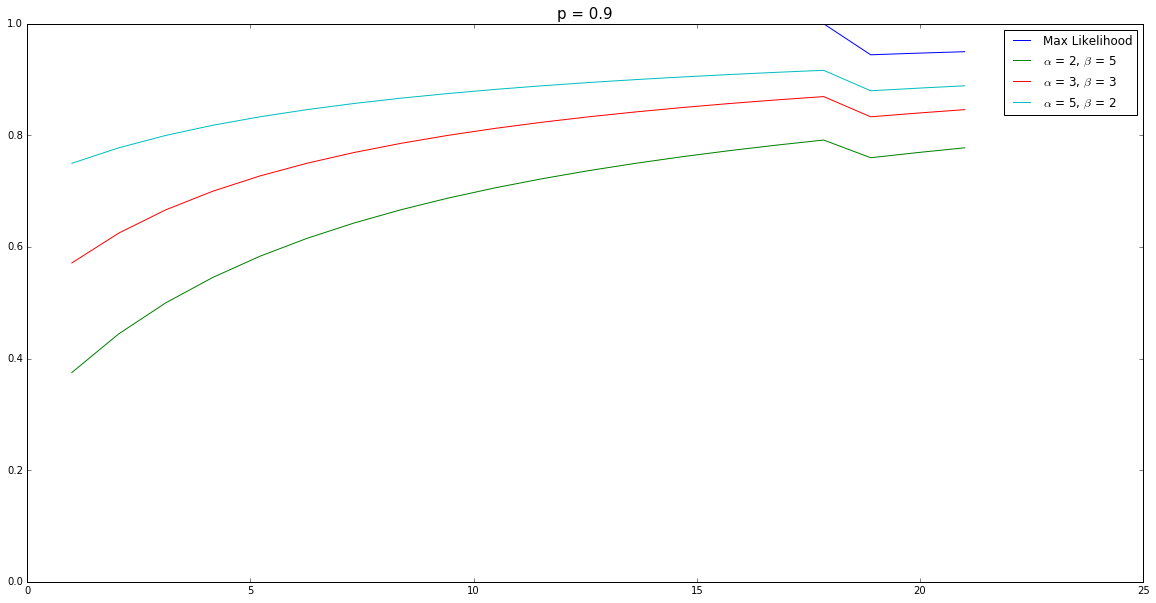

In [25]:
def draw_verisimilitude(p, X) :
    est = np.array([X[:n].mean() for n in range(1,21)])
    x = np.linspace(1,21,20)
    plt.plot(x, abs(est), label = 'Max Likelihood')
def draw_bayes(alpha, beta, X) :
    est = np.array([ (alpha + X[:n].sum())/(alpha + beta + n) for n in range(1, 21) ])
    x = np.linspace(1,21,20)
    plt.plot(x, abs(est), label = r'$\alpha$ = ' + str(alpha) + r', $\beta$ = ' + str(beta))

for p in [0.1, 0.25, 0.5, 0.75, 0.9] :
    plt.figure(figsize=(20,10))
    plt.title("p = " + str(p), fontsize = 15)
    X = sps.bernoulli.rvs(p, size = 20)
    draw_verisimilitude(p, X)
    for alpha, beta in [(2,5), (3,3), (5,2)] :
        draw_bayes(alpha, beta, X)
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

### 